In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Chargement des données
dataset = pd.read_csv('Breast Cancer Wisconsin.csv')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
print(dataset.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [9]:
print(dataset.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [11]:
print(dataset.shape)

(569, 33)


In [13]:
print(dataset.sample(5))

            id diagnosis  radius_mean  texture_mean  perimeter_mean  \
150  871001501         B        13.00         20.78           83.51   
541     921386         B        14.47         24.99           95.81   
221    8812818         B        13.56         13.90           88.59   
94      862028         M        15.06         19.83          100.30   
404     904969         B        12.34         14.95           78.29   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
150      519.4          0.11350           0.07589         0.03136   
541      656.4          0.08837           0.12300         0.10090   
221      561.3          0.10510           0.11920         0.07860   
94       705.6          0.10390           0.15530         0.17000   
404      469.1          0.08682           0.04571         0.02109   

     concave points_mean  ...  texture_worst  perimeter_worst  area_worst  \
150              0.02645  ...          24.11            90.82       616.7   
541 

In [17]:
# Suppression de la colonne inutile
if 'Unnamed: 32' in dataset.columns:
    dataset = dataset.drop('Unnamed: 32', axis=1)

In [19]:
# Conversion de "M" et "B" en 0 et 1
dataset["diagnosis"] = dataset["diagnosis"].map({"M": 1, "B": 0})

In [21]:
# Vérification des valeurs manquantes
print(dataset.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [23]:
# Définition des variables
X = dataset.iloc[:, 3:].values  # Exclure la colonne "diagnosis"
y = dataset["diagnosis"].values

In [25]:
# Assurer que y est un vecteur
y = y.ravel()


In [27]:
# Séparer en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Normalisation des données
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [47]:
classifier=KNeighborsClassifier(n_neighbors=38)

In [49]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=38)

In [35]:
y_pred=classifier.predict(X_test)

In [37]:
print (accuracy_score(y_test,y_pred)*100)

96.49122807017544


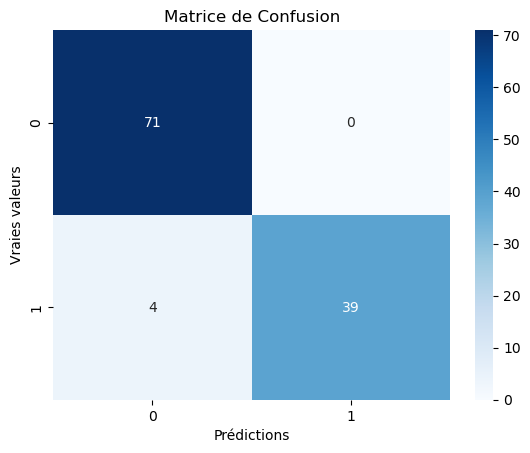

In [39]:
# 1. Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de Confusion')
plt.show()

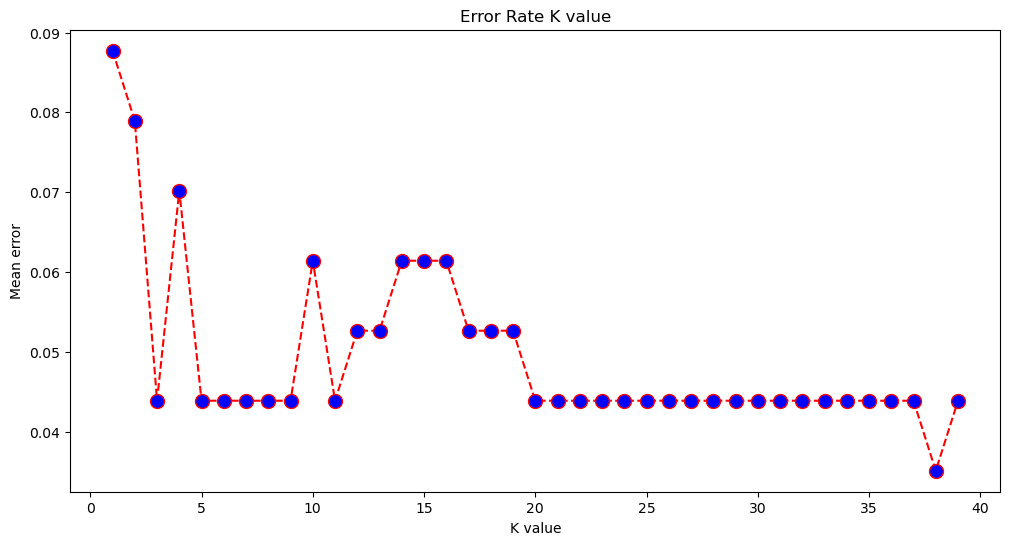

In [41]:
error =[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K value')
plt.ylabel('Mean error')
plt.show()